1.  Given a linked list which represents an integer number where each node is a digit of the represented integer. The task is to add a given digit N to the represented integer. Examples:

Input: LL = 9 -> 9 -> 3 -> NULL, N = 7 Output: 1 -> 0 -> 0 -> 0 -> NULL 993 + 7 = 1000 Input: LL = 2 -> 9 -> 9 -> NULL, N = 5 Output: 3 -> 0 -> 4 -> NULL

In [ ]:
# Python implementation of the approach

# Node class contains value
# and next node reference
class ListNode:
	def __init__(self, new_data):
		self.value = new_data
		self.next = None

# To store the carry
carry = 0

# Function that calls the recursive method
# addNewValue to add a digit to the
# number represented as the linked list
def addValue(head, addValue):

	global carry
	
	# Add the digit recursively
	addNewValue(head, addValue)

	# If there is a carry after the addition
	if (carry != 0) :

		# Create a node
		newHead = ListNode(0)

		# Assign it with carry
		newHead.value = carry

		# Make it point to the head of
		# the linked list
		newHead.next = head
		carry = 0

		# Make it the head
		return newHead
		
	# If there's not carry then
	# return the previous head
	else :
		return head
	
# Recursive function to add a digit to the number
# represented as the given linked list
def addNewValue(head,addValue):
	
	global carry

	# If it is the last node in the list
	if (head.next == None) :

		# Add the digit
		val = head.value + addValue

		# Find the carry if any
		head.value = val % 10
		carry = int(val / 10)
	
	else :

		# Preserve the current node's value and call
		# the recursive function for the next node
		val = head.value
		addNewValue(head.next, addValue)
		val = val + carry
		head.value = val % 10
		carry = int(val / 10)
		
# Utility function to print the linked list
def printList(node):
	
	while (node != None) :
		print(node.value ,end= " -> ")
		node = node.next
		
	print("None")
	
# Driver code

# Create the linked list 9 -> 9 -> 3 -> None
head = ListNode(0)
head.value = 9
head.next = ListNode(0)
head.next.value = 9
head.next.next = ListNode(0)
head.next.next.value = 3
head.next.next.next = None

# Digit to be added
n = 7
head = addValue(head, n)

printList(head)


1 -> 0 -> 0 -> 0 -> None


2. There are some glasses with equal capacity as 1 litre. The glasses are kept as follows:
               1
             2   3
          4    5    6
        7    8    9   10
You can put water to the only top glass. If you put more than 1-litre water to 1st glass, water overflows and fills equally in both 2nd and 3rd glasses. Glass 5 will get water from both 2nd glass and 3rd glass and so on. If you have X litre of water and you put that water in a top glass, how much water will be contained by the jth glass in an ith row? 

In [ ]:
# Program to find the amount
# of water in j-th glass of
# i-th row

# Returns the amount of water
# in jth glass of ith row
def findWater(i, j, X):
	# A row number i has maximum
	# i columns. So input column
	# number must be less than i
	if (j > i):
		print("Incorrect Input");
		return;

	# There will be i*(i+1)/2
	# glasses till ith row
	# (including ith row)
	# and Initialize all glasses
	# as empty
	glass = [0]*int(i *(i + 1) / 2);

	# Put all water
	# in first glass
	index = 0;
	glass[index] = X;

	# Now let the water flow to
	# the downward glasses till
	# the row number is less
	# than or/ equal to i (given
	# row) correction : X can be
	# zero for side glasses as
	# they have lower rate to fill
	for row in range(1,i):
		# Fill glasses in a given
		# row. Number of columns
		# in a row is equal to row number
		for col in range(1,row+1):
			# Get the water
			# from current glass
			X = glass[index];

			# Keep the amount less
			# than or equal to
			# capacity in current glass
			glass[index] = 1.0 if (X >= 1.0) else X;

			# Get the remaining amount
			X = (X - 1) if (X >= 1.0) else 0.0;

			# Distribute the remaining
			# amount to the down two glasses
			glass[index + row] += (X / 2);
			glass[index + row + 1] += (X / 2);
			index+=1;

	# The index of jth glass
	# in ith row will
	# be i*(i-1)/2 + j - 1
	return glass[int(i * (i - 1) /2 + j - 1)];

# Driver Code
if __name__ == "__main__":
	
	i = 2;
	j = 2;
	X = 2.0;
# Total amount of water

	res=repr(findWater(i, j, X));
	print("Amount of water in jth glass of ith row is:",res.ljust(8,'0'));

Amount of water in jth glass of ith row is: 0.500000


3. Given an array arr[] consisting of N integers and an array P[] consisting of M integers such that P[i] represents the score obtained by working on the ith day. The task is to find the minimum number of days needed to work to achieve a score of at least arr[i], for each array element arr[i].
Examples:

Input: arr[] = {400, 200, 700}, P[] = {100, 300, 400, 500, 600} Output: 2 2 3 4 5 Explanation: Following are the number of days required for each array elements:

arr[0](= 400): To earn 400 points one has to work for first 2 days making the total points equal to 100 + 300 = 400(>= arr[0]). arr[1](= 200): To earn 200 points one has to work for first 2 days making the total points = 100 + 300 = 400(>= arr[1]). arr[2](= 700): To earn 700 points one has to work for first 3 days making the total points = 100 + 300 + 400 = 800(>= arr[2]). Input: arr[] = {1400}, P[] = {100, 300} Output: -1

In [ ]:
# Python3 program for the above approach

# Function to find the minimum number
# of days required to work to at least
# arr[i] points for every array element
def minDays(P, arr):

	# Traverse the array P[]
	for i in range(1, len(P)):
	
		# Find the prefix sum
		P[i] += P[i] + P[i - 1]

	# Traverse the array arr[]
	for i in range(len(arr)):
	
		# Find the minimum index of
		# the array having value
		# at least arr[i]
		index = binarySeach(P, arr[i])

		# If the index is not -1
		if (index != -1):
			print(index + 1, end = " ")
		# Otherwise
		else:
			print(-1, end = " ")

# Function to find the lower bound
# of N using binary search
def binarySeach(P, N):

	# Stores the lower bound
	i = 0

	# Stores the upper bound
	j = len(P) - 1

	# Stores the minimum index
	# having value is at least N
	index = -1

	# Iterater while i<=j
	while (i <= j):

		# Stores the mid index
		# of the range [i, j]
		mid = i + (j - i) // 2

		# If P[mid] is at least N
		if (P[mid] >= N):

			# Update the value of
			# mid to index
			index = mid

			# Update the value of j
			j = mid - 1

		# Update the value of i
		else:
			i = mid + 1

	# Return the resultant index
	return index

	# Driver Code
if __name__ == '__main__':
	arr = [400, 200, 700,900,1400 ]
	P = [100, 300, 400, 500, 600 ]
	minDays(P, arr)



2 2 2 3 3 

4. Given two positive integers K and N, the task is to find the permutation present at the middle of all permutations of at most length N, consisting of integers from the range [1, K], arranged lexicographically.

In [ ]:
# Python3 program for the above approach

# Function that finds the middle the
# lexicographical smallest sequence
def lexiMiddleSmallest(K, N):
	# If K is even
	if (K % 2 == 0):

		# First element is K/2
		print(K // 2,end=" ")

		# Remamining elements of the
		# sequence are all integer K
		for i in range(N - 1):
			print(K, end = " ")
		print()
		return

	# Stores the sequence when K
	# is odd
	a = [(K + 1) // 2]*(N)

	# Iterate over the range [0, N/2]
	for i in range(N//2):
		# Check if the sequence ends
		# with in 1 or not
		if (a[-1] == 1):

			# Remove the sequence
			# ending in 1
			del a[-1]

		# If it doesn't end in 1
		else:

			# Decrement by 1
			a[-1] -= 1

			# Insert K to the sequence
			# till its size is N
			while (len(a) < N):
				a.append(K)

	# Prthe sequence stored
	# in the vector
	for i in a:
		print(i, end = " ")
	print()

# Driver Code
if __name__ == '__main__':
	K, N = 2, 4
	lexiMiddleSmallest(K, N)


 

1 2 2 2 


5. Given a binary string s, the task is to find the length of the longest subsequence that can be divided into three substrings such that the first and third substrings are either empty or filled with 1 and the substring at the middle is either empty or filled with 0.

In [ ]:
# Python3 program to find the
# longest subsequence possible
# that starts and ends with 1
# and filled with 0 in the middle
import sys

def longestSubseq(s, length):
	
	# Prefix array to store the
	# occurences of '1' and '0'
	# Initialise prefix arrays with 0
	ones = [0 for i in range(length + 1)]
	zeroes = [0 for i in range(length + 1)]

	# Iterate over the length of the string
	for i in range(length):
		
		# If current character is '1'
		if(s[i] == '1'):
			ones[i + 1] = ones[i] + 1
			zeroes[i + 1] = zeroes[i]

		# If current character is '0'
		else:
			zeroes[i + 1] = zeroes[i] + 1
			ones[i + 1] = ones[i]

	answer = -sys.maxsize - 1
	x = 0

	for i in range(length + 1):
		for j in range(i, length + 1):
			
			# Add '1' available for
			# the first string
			x += ones[i]

			# Add '0' available for
			# the second string
			x += (zeroes[j] - zeroes[i])

			# Add '1' available for
			# the third string
			x += (ones[length] - ones[j])

			# Update answer
			answer = max(answer, x)
			x = 0

	# Print the final result
	print(answer)

# Driver Code
S = "10010010111100101"
length = len(S)

longestSubseq(S, length)


 

12


6. Given an array A[] of size N, the task is to find the maximum length of the longest non-decreasing array that can be generated from the given array by appending elements from either of the ends of the given array to the end of the resultant array and removing the appended element one by one. 

In [ ]:
# Python3 program to implement
# the above approach

# Function to find the length of
# the longest non-decreasing array
# that can be generated
def findLongestNonDecreasing(A, N):

	# Stores the length of the longest
	# non-decreasing array that can be
	# generated from the array
	res = 0;

	# Stores index of
	# start pointer
	start = 0;

	# Stores index of
	# end pointer
	end = N - 1;

	# Stores previously inserted
	# element into the new array
	prev = -1;

	# Traverse the array
	while (start <= end):

		# If A[start] is less than
		# or equal to A[end]
		if (A[start] <= A[end]):

			# If no element inserted into
			# the newly generated array
			if (prev == -1):

				# Update prev
				prev = A[start];

				# Update res
				res += 1

				# Update start
				start += 1

			else:

				# If A[start] is greater
				# than or equal to prev
				if (A[start] >= prev):

					# Update res
					res += 1

					# Update prev
					prev = A[start];

					# Update start
					start += 1

				# If A[end] is greater
				# than or equal to prev
				elif (A[end] >= prev):

					# Update res
					res += 1

					# Update prev
					prev = A[end];

					# Update end
					end -= 1

				else:
					break;

		# If A[end] is
		# greater than A[start]
		else:

			# If no element inserted into
			# the newly generated array
			if (prev == -1):

				# Update prev
				prev = A[end];

				# Update res
				res += 1

				# Update end
				end -= 1

			else:

				# If A[end] is greater
				# than or equal to prev
				if (A[end] >= prev):

					# Update res
					res += 1

					# Update prev
					prev = A[end];

					# Update end
					end -= 1

				# If A[start] is greater
				# than or equal to prev
				elif (A[start] >= prev):

					# Update res
					res += 1

					# Update prev
					prev = A[start];

					# Update start
					start += 1

				else :
					break;
				
	return res

# Driver Code
if __name__ == "__main__":

	A = [1, 1, 3, 5,
		4, 3, 6, 2, 1]
	
	N = len(A)
	
	# Function call
	print (findLongestNonDecreasing(A, N));




7


7. Given a string str of n lowercase characters, the task is to count the number of substrings of str starting with character X and ending with character Y. 

In [ ]:
# Python 3 implementation to count substrings
# starting with character X and ending
# with character Y

# function to count substrings starting with
# character X and ending with character Y
def countSubstr(str, n, x, y):

	# to store total count of
	# required substrings
	tot_count = 0

	# to store count of character 'x'
	# up to the point the string 'str'
	# has been traversed so far
	count_x = 0

	# traverse 'str' form left to right
	for i in range(n):

		# if true, increment 'count_x'
		if str[i] == x:
			count_x += 1

		# if true accumulate 'count_x'
		# to 'tot_count'
		if str[i] == y:
			tot_count += count_x
	
	# required count
	return tot_count

# Driver Code
str = 'abbcaceghcak'
n = len(str)
x, y = 'a', 'c'
print('Count =', countSubstr(str, n, x, y))


 

Count = 5


8. Python supports a useful concept of default argument values. For each keyword argument of a function, we can assign a default value which is going to be used as the value of said argument if the function is called without it. For example, consider the following increment function:

def increment_by(n, increment=1):
    return n + increment
The functions works like this:

>>> increment_by(5, 2)
7
>>> increment_by(4)
5
>>>
Debug the given function print_from_stream using the default value of one of its arguments.

The function has the following signature:

def print_from_stream(n, stream)
This function should print the first  values returned by get_next() method of stream object provided as an argument. Each of these values should be printed in a separate line.

Whenever the function is called without the stream argument, it should use an instance of EvenStream class defined in the code stubs below as the value of stream.

Your function will be tested on several cases by the locked template code.

Input Format

The input is read by the provided locked code template. In the first line, there is a single integer  denoting the number of queries. Each of the following  lines contains a stream_name followed by integer , and it corresponds to a single test for your function.

Constraints

Output Format

The output is produced by the provided and locked code template. For each of the queries (stream_name, n), if the stream_name is even then print_from_stream(n) is called. Otherwise, if the stream_name is odd, then print_from_stream(n, OddStream()) is called.

Sample Input 0

3
odd 2
even 3
odd 5
Sample Output 0

1
3
0
2
4
1
3
5
7
9

In [ ]:
class EvenStream(object):
    def __init__(self):
        self.current = 0

    def get_next(self):
        to_return = self.current
        self.current += 2
        return to_return

class OddStream(object):
    def __init__(self):
        self.current = 1

    def get_next(self):
        to_return = self.current
        self.current += 2
        return to_return

def print_from_stream(n, stream=None):
    if stream is None:
        stream = EvenStream()
    for _ in range(n):
        print(stream.get_next())


queries = int(input())
for _ in range(queries):
    stream_name, n = input().split()
    n = int(n)
    if stream_name == "even":
        print_from_stream(n)
    else:
        print_from_stream(n, OddStream())

3
3 6
1
3
5
7
9
11
2 5
1
3
5
7
9
2 5
1
3
5
7
9


9. Given a binary matrix arr[][] of dimensions N * M , the task is to count the number of right-angled triangles that can be formed by joining the cells containing the value 1 such that the triangles must have any two of its sides parallel to the sides of the rectangle. 

In [ ]:
# Python3 program for the above approach

# Function to count the right-angled
# triangle in the given grid a[][]
def numberOfTriangle(a):
	
	N = len(a)
	M = len(a[0])

	# Stores the count of 1s for
	# each row[] and column[]
	rows = [0] * N
	columns = [0] * M

	# Find the number of 1s in
	# each of the rows[0, N - 1]
	for i in range(N):
		for j in range(M):

			# Increment row[i]
			if (a[i][j] == 1):
				rows[i] += 1

	# Find the number of 1s in
	# each of the columns[0, N - 1]
	for i in range(M):
		for j in range(N):

			# Increment columns[i]
			if (a[j][i] == 1):
				columns[i] += 1

	# Stores the count of triangles
	answer = 0

	for i in range(N):
		for j in range(M):

			# If current cell has value 1
			if (a[i][j] == 1):

				# Update the answer
				answer += ((rows[i] - 1) *
					(columns[j] - 1))

	# Return the count
	return answer

# Driver Code
if __name__ == '__main__':
	
	# Given grid arr
	arr = [ [ 1, 0, 1, 0 ],
			[ 0, 1, 1, 1 ],
			[ 1, 0, 1, 0 ],
			[ 0, 1, 0, 1 ] ]

	# Function call
	print(numberOfTriangle(arr))

# This code is contributed by mohit kumar 29


16


10. Given r is the radius of three equal circles touching each other. The task is to find the length of the rope tied around the circles 

In [ ]:
PI = 3.14159265
	
# Function to find the length
# of rope
def length_rope( r ):
	return ( ( 2 * PI * r ) + 6 * r )
	
# Driver code
r = 7
print( length_rope( r ))
 

85.98229710000001


11. Given an array of n positive distinct integers representing lengths of lines that can form a triangle. The task is to find the number of acute triangles, obtuse triangles, and right triangles separately that can be formed from the given array. 

In [ ]:
# Python3 program to count of acute, obtuse and right
# triangles in an array

# Find the number of acute, right, obtuse triangle
# that can be formed from given array.
def findTriangle(a, n) :
	
	b = []
	# Finding the square of each element of array
	for i in range(n) :
		b.append(a[i] * a[i])
	
	# Sort the sides of array and their squares.
	a.sort()
	b.sort()
	
	# x for acute triangles
	# y for right triangles
	# z for obtuse triangles
	x, y, z = 0, 0, 0
	
	for i in range(n) :
		p = i+1
		q = i+1
		for j in range(i + 1, n) :
			# Finding the farthest point p where
			# a^2 + b^2 >= c^2.
			while (p<n-1 and b[i]+b[j]>=b[p+1]) :
				p += 1
			q = max(q, p)
			# Finding the farthest point q where
			# a + b > c.
			while (q<n-1 and a[i]+a[j]>a[q+1]) :
				q += 1
				
			# If point p make right triangle.
			if (b[i]+b[j]==b[p]) :
				# All triangle between j and p are acute
				# triangles. So add p - j - 1 in x.
				x += max(p - j - 1, 0)
				# Increment y by 1.
				y += 1
				# All triangle between q and p are acute
				# triangles. So add q - p in z.
				z += q - p
			# If no right triangle
			else :
				# All triangle between j and p are acute
				# triangles. So add p - j in x.
				x += max(p - j, 0)
				# All triangle between q and p are acute
				# triangles. So add q - p in z.
				z += q - p
	
	print("Acute Triangle:",x )
	print("Right Triangle:", y)
	print("Obtuse Triangle:", z)


# Driver Code
if __name__ == "__main__" :

	arr = [2, 3, 9, 10, 12, 15]
	n = len(arr)
	findTriangle(arr, n)



Acute Triangle: 2
Right Triangle: 1
Obtuse Triangle: 4


12. Given two positive integers A and B representing the sides of the right kite, the task is to find the area of the circumcircle and incircle of a right kite.
A right kite is a kite that can be inscribed in a circle with two opposite angles are at right angles. The line of symmetry of the kite is also the diameter of the circumcircle of the kite. It divides the kite into two congruent right-angled triangles having sides as A and B of a right kite. 

In [ ]:
# Python program for the above approach
# Function to calculate the area of
# circumcircle of right kite
import math
pi = 3.14

def AreaOfCircumcircle(a, b):

	# Find the radius
	radius = math.sqrt(a * a + b * b)/ 2
	return pi * radius * radius


# Function to calculate the area of
# incircle of right kite
def AreaOfIncircle( a, b):

	# Find the radius
	radius = (a * b) // (a + b)
	return pi * (radius**2)


# Driver Code
# Given Input
a = 10
b = 5

# Function Call
circumarea = AreaOfCircumcircle(a, b)
print("Area of circumcircle of Right Kite is" ," " , format(circumarea,".3f"))

# Function Call
inarea = AreaOfIncircle(a, b)
print("Area of incircle of Right Kite is" ," " , format(inarea,".2f"))

Area of circumcircle of Right Kite is   98.125
Area of incircle of Right Kite is   28.26


13. Given an integer R which denotes the radius of a circle, the task is to find the area of an equilateral triangle inscribed in this circle.
Examples:

Input: R = 4 Output: 20.784

In [ ]:
# Python 3 implementation to find
# the area of the equilateral triangle
# inscribed in a circle of radius R

# Function to find the area of
# equilateral triangle inscribed
# in a circle of radius R
def area(R):
	# Base and Height of
	# equilateral triangle
	base = 1.732 * R
	height = ( 3 / 2 ) * R
	
	# Area using Base and Height
	area = (( 1 / 2 ) * base * height )
	return area
	
# Driver Code
if __name__=='__main__':
	R = 7
	print(area(R))


63.651


14. Given a rod of length L, the task is to cut the rod in such a way that the total number of segments of length p, q and r is maximized. The segments can only be of length p, q, and r. 

In [ ]:
# Python 3 program to
# maximize the number
# of segments of length
# p, q and r

# Function that returns
# the maximum number
# of segments possible


def findMaximum(l, p, q, r):

	# Array to store the cut
	# at each length
	# All values with -1
	dp = [-1]*(l + 1)

	# if length of rod is 0 then
	# total cuts will be 0
	# so, initialize the dp[0] with 0
	dp[0] = 0

	for i in range(l+1):

		# if certain length is not
		# possible
		if (dp[i] == -1):
			continue

		# if a segment of p is possible
		if (i + p <= l):
			dp[i + p] = (max(dp[i + p],
							dp[i] + 1))

		# if a segment of q is possible
		if (i + q <= l):
			dp[i + q] = (max(dp[i + q],
							dp[i] + 1))

		# if a segment of r is possible
		if (i + r <= l):
			dp[i + r] = (max(dp[i + r],
							dp[i] + 1))

	# if no segment can be cut then return 0
	if dp[l] == -1:
		dp[l] = 0
	# return value corresponding
	# to length l
	return dp[l]


# Driver Code
if __name__ == "__main__":
	l = 11
	p = 2
	q = 3
	r = 5

	# Calling Function
	ans = findMaximum(l, p, q, r)
	print(ans)

# This code is contributed by
# ChitraNayal


5


15. Given a number in the form of a string s, the task is to calculate and display minimum splits required such that the segments formed are Prime or print Not Possible otherwise.

In [ ]:
# Python 3 program to
# maximize the number
# of segments of length
# p, q and r

# Function that returns
# the maximum number
# of segments possible


def findMaximum(l, p, q, r):

	# Array to store the cut
	# at each length
	# All values with -1
	dp = [-1]*(l + 1)

	# if length of rod is 0 then
	# total cuts will be 0
	# so, initialize the dp[0] with 0
	dp[0] = 0

	for i in range(l+1):

		# if certain length is not
		# possible
		if (dp[i] == -1):
			continue

		# if a segment of p is possible
		if (i + p <= l):
			dp[i + p] = (max(dp[i + p],
							dp[i] + 1))

		# if a segment of q is possible
		if (i + q <= l):
			dp[i + q] = (max(dp[i + q],
							dp[i] + 1))

		# if a segment of r is possible
		if (i + r <= l):
			dp[i + r] = (max(dp[i + r],
							dp[i] + 1))

	# if no segment can be cut then return 0
	if dp[l] == -1:
		dp[l] = 0
	# return value corresponding
	# to length l
	return dp[l]


# Driver Code
if __name__ == "__main__":
	l = 11
	p = 2
	q = 3
	r = 5

	# Calling Function
	ans = findMaximum(l, p, q, r)
	print(ans)

# This code is contributed by
# ChitraNayal


5


16. Given a binary number, the task is to remove exactly one bit from it such that, after it’s removal, the resultant binary number is greatest from all the options.

In [ ]:
# Python3 program to find next maximum
# binary number with one bit removed

# Function to find the maximum
# binary number
def printMaxAfterRemoval(s):

	flag = False
	n = len(s)

	# Traverse the binary number
	for i in range(0, n):

		# Try finding a 0 and skip it
		if s[i] == '0' and flag == False:
			flag = True
			continue
		
		else:
			print(s[i], end = "")

# Driver code
if __name__ == "__main__":

	# Get the binary number
	s = "1001"

	# Find the maximum binary number
	printMaxAfterRemoval(s)

# This code is contributed
# by Rituraj Jain


101

17. Given two strings str1 and str2 of size N consisting of only three characters A, B, and C, the task is to check whether the string str1 can be changed to str2 using the below operations:
Replacing one occurrence of “BC” with “CB” i.e swap adjacent ‘B’ and ‘C’. Replacing one occurrence of “CA” with “AC” i.e swap adjacent ‘C’ and ‘A’. Print “Yes” if we can transform the string else print “No”. Examples:

Input: str1 = “BCCABCBCA”, str2 = “CBACCBBAC” Output: Yes

In [ ]:
# Python3 program for the above approach

# Function to check if it is possible
# to transform start to end
def canTransform(str1, str2):
	
	s1 = ""
	s2 = ""

	# Check the sequence of A, B in
	# both strings str1 and str2
	for c in str1:
		if (c != 'C'):
			s1 += c

	for c in str2:
		if (c != 'C'):
			s2 += c

	# If both the strings
	# are not equal
	if (s1 != s2):
		return False

	i = 0
	j = 0
	n = len(str1)

	# Traverse the strings
	while (i < n and j < n):
		if (str1[i] == 'C'):
			i += 1

		elif (str2[j] == 'C'):
			j += 1

		# Check for indexes of A and B
		else:
			if ((str1[i] == 'A' and i < j) or
				(str1[i] == 'B' and i > j)):
				return False
				
			i += 1
			j += 1

	return True

# Driver Code
if __name__ == '__main__':
	
	str1 = "BCCABCBCA"
	str2 = "CBACCBBAC"

	# Function call
	if (canTransform(str1, str2)):
		print("Yes")
	else:
		print("No")

# This code is contributed by mohit kumar 29


Yes


18. Given a sorted array arr[] consisting of N positive integers such that arr[i] represent the days in which a worker will work and an array cost[] of size 3 representing the salary paid to the workers for 1 day, 7 days and 30 days respectively, the task is to find the minimum cost required to have a worker for all the given days in arr[]. 

In [ ]:
# Python Program for the above approach

# Function to find the minimum cost
# to hire the workers for the given
# days in the array days[]
def MinCost(days, cost, N):
	
	size = days[N - 1] + 1

	# Initialize the array dp
	dp = [0 for i in range(size)]

	# Minimum Cost for Nth day
	dp[size - 1] = min(cost[0], min(cost[1], cost[2]))

	# Poleter of the array arr[]
	ptr = N - 2

	# Traverse from right to left
	for i in range(size - 2, 0, -1):

		if (ptr >= 0 and days[ptr] == i):

			# If worker is hired for 1 day
			val1 = dp[i + 1] + cost[0]

			# If worker is hired for 7 days
			val2 = cost[1] + ( 0 if (i + 7 >= size) else dp[i + 7])

			# If worker is hired for 30 days
			val3 = cost[2] + ( 0 if (i + 30 >= size) else dp[i + 30])

			# Update the value of dp[i] as
			# minimum of 3 options
			dp[i] = min(val1, min(val2, val3))
			ptr -= 1;

		# If the day is not at the
		# array arr[]
		else:
			dp[i] = dp[i + 1]
	
	# Return the answer
	return dp[1]

# Driver Code
arr = [2, 4, 6, 7, 8, 10, 17]
cost = [3, 8, 20]
N = len(arr)
print(MinCost(arr, cost, N))

# This code is contributed by gfgking
 

14


19. Given an array with repeated elements, the task is to find the maximum distance between two occurrences of an element.
Examples:

Input : arr[] = {3, 2, 1, 2, 1, 4, 5, 8, 6, 7, 4, 2} Output: 10 // maximum distance for 2 is 11-1 = 10 // maximum distance for 1 is 4-2 = 2 // maximum distance for 4 is 10-5 = 5

In [ ]:
# Python program to find maximum distance between two
# same occurrences of a number.

# Function to find maximum distance between equal elements
def maxDistance(arr, n):
	
	# Used to store element to first index mapping
	mp = {}

	# Traverse elements and find maximum distance between
	# same occurrences with the help of map.
	maxDict = 0
	for i in range(n):

		# If this is first occurrence of element, insert its
		# index in map
		if arr[i] not in mp.keys():
			mp[arr[i]] = i

		# Else update max distance
		else:
			maxDict = max(maxDict, i-mp[arr[i]])

	return maxDict

# Driver Program
if __name__=='__main__':
	arr = [3, 2, 1, 2, 1, 4, 5, 8, 6, 7, 4, 2]
	n = len(arr)
	print(maxDistance(arr, n))
		
# Contributed By: Harshit Sidhwa
 

10


20. Given an array arr[] consisting of queries of the form {L, R}, the task for each query is to count the numbers in the range [L, R] that can be expressed as the sum of its digits raised to the power of count of digits.

In [ ]:
# Python 3 program for the above approach
R = 100005
arr = [0 for i in range(R)]

# Function to check if a number N can be
# expressed as sum of its digits raised
# to the power of the count of digits
def canExpress(N):
	temp = N

	# Stores the number of digits
	n = 0
	while (N != 0):
		N //= 10
		n += 1

	# Stores the resultant number
	N = temp
	sum = 0
	while (N != 0):
		sum += pow(N % 10, n)
		N //= 10

	# Return true if both the
	# numbers are same
	return (sum == temp)

# Function to precompute and store
# for all numbers whether they can
# be expressed
def precompute():

	# Mark all the index which
	# are plus perfect number
	for i in range(1, R, 1):
	
		# If true, then update the
		# value at this index
		if(canExpress(i)):
			arr[i] = 1

	# Compute prefix sum of the array
	for i in range(1,R,1):
		arr[i] += arr[i - 1]

# Function to count array elements that
# can be expressed as the sum of digits
# raised to the power of count of digits
def countNumbers(queries, N):

	# Precompute the results
	precompute()

	# Traverse the queries
	for i in range(N):
		L1 = queries[i][0]
		R1 = queries[i][1]

		# Print the resultant count
		print((arr[R1] - arr[L1 - 1]),end = " ")

# Driver Code
if __name__ == '__main__':
	queries = [[1, 400],[1, 9]]
	N = len(queries)
	countNumbers(queries, N)

	# This code is contributed by SURENDRA_GANGWAR.
 

12 9 

21. Given an array of jobs where every job has a deadline and associated profit if the job is finished before the deadline. It is also given that every job takes a single unit of time, so the minimum possible deadline for any job is 1. How to maximize total profit if only one job can be scheduled at a time.

Examples: 

Input: Four Jobs with following 
deadlines and profits

JobID  Deadline  Profit

  a      4        20   

  b      1        10

  c      1        40  

  d      1        30

Output: Following is maximum 
profit sequence of jobs

        c, a   


Input:  Five Jobs with following
deadlines and profits

JobID   Deadline  Profit

  a       2        100

  b       1        19

  c       2        27

  d       1        25

  e       3        15

Output: Following is maximum 
profit sequence of jobs

        c, a, e

In [ ]:
# Program to find the maximum profit
# job sequence from a given array
# of jobs with deadlines and profits

# function to schedule the jobs take 2
# arguments array and no of jobs to schedule


def printJobScheduling(arr, t):

	# length of array
	n = len(arr)

	# Sort all jobs according to
	# decreasing order of profit
	for i in range(n):
		for j in range(n - 1 - i):
			if arr[j][2] < arr[j + 1][2]:
				arr[j], arr[j + 1] = arr[j + 1], arr[j]

	# To keep track of free time slots
	result = [False] * t

	# To store result (Sequence of jobs)
	job = ['-1'] * t

	# Iterate through all given jobs
	for i in range(len(arr)):

		# Find a free slot for this job
		# (Note that we start from the
		# last possible slot)
		for j in range(min(t - 1, arr[i][1] - 1), -1, -1):

			# Free slot found
			if result[j] is False:
				result[j] = True
				job[j] = arr[i][0]
				break

	# print the sequence
	print(job)


# Driver COde
arr = [['a', 2, 100], # Job Array
	['b', 1, 19],
	['c', 2, 27],
	['d', 1, 25],
	['e', 3, 15]]


print("Following is maximum profit sequence of jobs")

# Function Call
printJobScheduling(arr, 3)


Following is maximum profit sequence of jobs
['c', 'a', 'e']


22. Given a directed and connected graph with n nodes. If there is an edge from u to v then u depends on v. Our task was to find out the sum of dependencies for every node.
  
  Example: 
For the graph in diagram, 
A depends on C and D i.e. 2 
B depends on C i.e. 1 
D depends on C i.e. 1 
And C depends on none. 
Hence answer -> 0 + 1 + 1 + 2 = 4

In [ ]:
# Python3 program to find the sum
# of dependencies

# To add an edge
def addEdge(adj, u, v):

	adj[u].append(v)

# Find the sum of all dependencies
def findSum(adj, V):
	
	sum = 0
	
	# Just find the size at each
	# vector's index
	for u in range(V):
		sum += len(adj[u])
		
	return sum

# Driver code
if __name__=='__main__':

	V = 4
	adj = [[] for i in range(V)]
	
	addEdge(adj, 0, 2)
	addEdge(adj, 0, 3)
	addEdge(adj, 1, 3)
	addEdge(adj, 2, 3)
	
	print("Sum of dependencies is",
		findSum(adj, V))
	


Sum of dependencies is 4


23. Given N dependencies of the form X Y, where X & Y represents two different tasks. The dependency X Y denotes dependency of the form Y -> X i.e, if task Y happens then task X will happen in other words task Y has to be completed first to initiate task X. Also given M tasks that will initiate first. The task is to print all the tasks that will get completed at the end in the lexicographical order. Note that the tasks will be represented by upper case English letters only.

Input: dep[][] = {{A, B}, {C, B}, {D, A}, {D, C}, {B, E}}, tasks[] = {B, C}
Output: A B C D
Task A happens after task B and task D can only happen
after the completion of tasks A or C.
So, the required order is A B C D.

Input: dep[][] = {{Q, P}, {S, Q}, {Q, R}}, tasks[] = {R} 
Output: Q R S


In [ ]:
# Python3 implementation of the approach
from collections import defaultdict

# This class represents a directed graph
# using adjacency list representation
class Graph:

	# Constructor
	def __init__(self):

		# Default dictionary to store the graph
		self.graph = defaultdict(list)
		self.visited = [False]*26

	# Function to add an edge to the graph
	def addEdge(self, u, v):
		self.graph[ord(u)-65].append(ord(v)-65)

	# A function used by DFS
	def DFSUtil(self, v):
		
		# Mark the current node as visited
		# and print it
		self.visited[v]= True

		# Recur for all the vertices adjacent
		# to this vertex
		for i in self.graph[v]:
			if self.visited[i] == False:
				self.DFSUtil(i)


	# Function to perform the DFS traversal
	# It uses recursive DFSUtil()
	def DFS(self, start, M):
		
		# Total vertices
		V = len(self.graph)
		
		# Call the recursive helper function
		# to print the DFS traversal starting
		# from all vertices one by one
		for i in range(M):
			self.DFSUtil(ord(start[i])-65)
	
	def printOrder(self):
		for i in range(26):
			if self.visited[i] == True:
				print(chr(i + 65), end =" ")
		print("\n")

# Driver code
g = Graph()
g.addEdge('B', 'A')
g.addEdge('B', 'C')
g.addEdge('A', 'D')
g.addEdge('C', 'D')
g.addEdge('E', 'B')

g.DFS(['B', 'C'], 2)
g.printOrder()


A B C D 



24. Given a 2D array, arr[][] of size N, each row of which consists of the time required to complete 3 different types of tasks A, B, and C. The row elements arr[i][0], arr[i][1] and arr[i][2] are the time required to complete the ith task of type A, B and C respectively. The task is to find the minimum completion time to complete exactly K tasks from the array based on the following conditions:

The same type of task will operate at the same time.
Tasks of type B can be performed only when K tasks of type A have already been completed.
Tasks of type C can be performed only when K tasks of type B have already been completed.
Examples:

Input: N = 3, K = 2, arr[][] = {{1, 2, 2}, {3, 4, 1}, {3, 1, 2}}

Output: 7 

In [ ]:
# Python3 program to implement
# the above approach
N = 3

# Function to get the minimum
# completion time to select
# exactly K items
def MinTime(arr, i, Ta, Tb, Tc, K):
	
	# Base cas
	if (K == 0):
		return Ta + Tb + Tc
	if (i == 0):
		return 10**9

	# Select the ith item
	X = MinTime(arr, i - 1,
			max(Ta, arr[i - 1][0]),
			max(Tb, arr[i - 1][1]),
			max(Tc, arr[i - 1][2]), K -1)

	# Do not select the ith item
	Y = MinTime(arr, i - 1,
				Ta, Tb, Tc, K)

	return min(X, Y)

# Driver Code
if __name__ == '__main__':
	
	K = 2
	n = 3
	arr = [ [ 1, 2, 2 ],
			[ 3, 4, 1 ],
			[ 3, 1, 2 ] ]

	print(MinTime(arr, N, 0, 0, 0, K))




7


25. Given an array arr[] consisting of N positive integers representing the ratings of N children, the task is to find the minimum number of candies required for distributing to N children such that every child gets at least one candy and the children having the higher rating get more candies than its neighbours.

Examples:

Input: arr[] = {1, 0, 2}
Output: 5
Explanation:
Consider the distribution of candies as {2, 1, 2} that satisfy the given conditions. Therefore, the sum of candies is 2 + 1 + 2 = 5, which is the minimum required candies.

Input: arr[] = {1, 2, 2}
Output: 4

In [ ]:
# Python3 program for the above approach

# Function to count the minimum number
# of candies that is to be distributed
def countCandies(arr, n):
	
	# Stores total count of candies
	sum = 0

	# Stores the amount of candies
	# allocated to a student
	ans = [1] * n

	# If the value of N is 1
	if (n == 1):
		return 1

	# Initialize with 1 all array
	# element
	# for (i = 0 i < n i++)
	#	 ans[i] = 1

	# Traverse the array arr[]
	for i in range(n - 1):

		# If arr[i+1] is greater than
		# arr[i] and ans[i+1] is
		# at most ans[i]
		if (arr[i + 1] > arr[i] and
			ans[i + 1] <= ans[i]):
			
			# Assign ans[i]+1 to
			# ans[i+1]
			ans[i + 1] = ans[i] + 1

	# Iterate until i is atleast 0
	for i in range(n - 2, -1, -1):
		
		# If arr[i] is greater than
		# arr[i+1] and ans[i] is
		# at most ans[i+1]
		if (arr[i] > arr[i + 1] and
			ans[i] <= ans[i + 1]):

			# Assign ans[i+1]+1 to
			# ans[i]
			ans[i] = ans[i + 1] + 1

		# If arr[i] is equals arr[i+1]
		# and ans[i] is less than
		# ans[i+1]
		elif (arr[i] == arr[i + 1] and
			ans[i] < ans[i + 1]):

			# Assign ans[i+1]+1 to
			# ans[i]
			ans[i] = ans[i + 1] + 1

		# Increment the sum by ans[i]
		sum += ans[i]

	sum += ans[n - 1]

	# Return the resultant sum
	return sum

# Driver Code
if __name__ == '__main__':
	
	arr = [ 1, 0, 2 ]
	N = len(arr)
	
	print (countCandies(arr, N))

5


26. Given N students and a total of M sets of question paper where M ≤ N. All the M sets are different and every sets is available in sufficient quantity. All the students are sitting in a single row. The task is to find the number of ways to distribute the question paper so that if any M consecutive students are selected then each student has a unique question paper set. The answer could be large, so print the answer modulo 109 + 7. 

In [ ]:
# Python3 implementation of the approach
MOD = 1000000007;

# Function to return n! % 1000000007
def factMod(n) :

	# To store the factorial
	fact = 1;

	# Find the factorial
	for i in range(2, n + 1) :
		fact *= (i % MOD);
		fact %= MOD;

	return fact;

# Function to return the
# count of possible ways
def countWays(n, m) :

	return factMod(m);

# Driver code
if __name__ == "__main__" :

	n = 2; m = 2;

	print(countWays(n, m));



2


27. Given N Chocolates and K students, the task is to find how to divide the chocolates such that the difference between the minimum and maximum chocolate received by all students is minimized. Print the value of minimum and maximum chocolate distribution. 

In [ ]:
# Python implementation of the above approach

n, k = 7, 3
if(n % k == 0):
	print(n//k, n//k)

else:
	print((n-n % k)//k, (n-n % k)//k + 1)


2 3


28. Given two integers N and C, representing the number of boys and candies, and an integer K, the task is to calculate the maximum and the minimum number of candies received by any boy such that the difference between them is K.

Examples:
Input: N = 4, C = 12, K = 3
Output:
Maximum = 5
Minimum = 2 

In [ ]:
# Python3 program for the above approach

# Function to calculate the
# maximum and minimum number
# of candies a boy can possess
def max_min(N, C, K):
	
	maximum = 0
	minimum = 0
	
	if (N == 1):
		
		# All candies will be
		# given to one boy
		maximum = minimum = C

	elif (K >= C):
		
		# All the candies will
		# be given to 1 boy
		maximum = C
		minimum = 0

	else:
		
		# Give K candies to 1st
		# boy initially
		maximum = K
		minimum = 0

		# Count remaining candies
		remain_candy = C - K

		maximum += remain_candy // N
		minimum = remain_candy // N

	# If the last candy of remaining candies
	# is given to the last boy, i.e Nth boy
	if (remain_candy % N == N - 1):
		
		# Increase minimum count
		minimum += 1

	print("Maximum = {}".format(maximum))
	print("Minimum = {}".format(minimum))

# Driver code
N = 4
C = 12
K = 3

max_min(N, C, K)



Maximum = 5
Minimum = 2


29. There are n boys and n girls are to be seated around a round table, in a circle. The task is to find the number of ways in which n boys and n girls can sit alternatively around a round table. Given n<10
Examples: 
 

Input: n = 5 
Output: 2880

Input: n = 1
Output: 1

In [ ]:
# Python3 program to find number
# of ways in which n boys and n
# girls can sit alternatively
# sound a round table.

# Get n
n = 5

# find fac1 = (n-1)!
fac1 = 1
for i in range(2, n):
	fac1 = fac1 * i

# Find fac2 = n!
fac2 = fac1 * n

# Find total number of ways
totalWays = fac1 * fac2

# Print the total number of ways
print(totalWays)




2880


30. Given an array, the task is to shift the middle element to the start and end of the array alternatively, till the middle element becomes equal to the first element of the original array.

Input: arr[]=[2, 8, 5, 9, 10]
Output: [9, 5, 2, 10, 8]
Explanation: We can get this output by shifting middle element
step1: middle element 5 is shifted to front of array [5, 2, 8, 9, 10]
step2: middle element 8 is shifted to end of array [5, 2, 9, 10, 8]
step3: middle element 9 is shifted to front of array [9, 5, 2, 10, 8] 

In [ ]:
# Function for shifting middle element.
def AlternateShift(arr, x):

	# get middle index
	mid = len(arr) // 2

	# initialize c to 0
	c = 0

	# Shift middle element
	# till its value not equals to x.
	while arr[mid] != x:

		# pop middle element
		z = arr.pop(mid)

		# if c is even then insert z
		# at start of the array
		if c % 2 == 0:
			arr.insert(0, z)

		# if c is odd then insert z
		# at end of the array
		else:
			arr.append(z)

		# increment count c
		c += 1


Arr = [2, 8, 5, 9, 10]

# initialize a to zero index array value
a = Arr[0]

# call AlternateShift function
AlternateShift(Arr, a)

# print the changed array Unpacking array
print(*Arr)


9 5 2 10 8


31. Given a permutation P of size N, having values from 1 to N. the task is to find the minimum number of adjacent swaps required such that for all i in the range [1, N], P[i] does not equal i.
Examples: 
 

Input: P = [1, 4, 3, 5, 2] 
Output: 2 

In [ ]:
# Python3 program for the above approach

# Function to find the minimum
# number of swaps
def solve(P, n):

	# New array to convert
	# to 1-based indexing
	arr = []

	arr.append(0)

	for x in P:
		arr.append(x)

	# Keeps count of swaps
	cnt = 0

	for i in range(1, n):

		# Check if it is an 'X' position
		if (arr[i] == i):
			arr[i], arr[i + 1] = arr[i + 1], arr[i]
			cnt += 1

	# Corner Case
	if (arr[n] == n):
		arr[n - 1], arr[n] = arr[n] , arr[n - 1]
		cnt += 1

	# Print the minimum swaps
	print(cnt)

# Driver Code

# Given number N
N = 9

# Given permutation of N numbers
P = [ 1, 2, 4, 9, 5,
	8, 7, 3, 6 ]

# Function call
solve(P, N)



3


32. Given a matrix, mat[][] of size N × N, the task is to minimize the count of adjacent row swaps to convert the given matrix to a lower triangular matrix. If it is not possible to convert the given matrix to a lower triangular matrix, then print -1. 
Note: A lower triangular matrix contains 0s at all the indices above the main diagonal.

Examples:

Input: mat[][] = {{0, 0, 2}, {3, 1, 0}, {4, 0, 0}}
Output: 3

In [ ]:
# Python3 program to implement
# the above approach

# Function to count the minimum
# number of adjacent swaps
def minAdjSwaps(mat):
	
	# Stores the size of
	# the given matrix
	N = len(mat)

	# Stores the count of zero
	# at the end of each row
	cntZero = [0] * (N)

	# Traverse the given matrix
	for i in range(N):

		# Count of 0s at the end
		# of the ith row
		for j in range(N - 1, -1, -1):
			if mat[i][j] != 0:
				break
			
			cntZero[i] += 1

	# Stores the count of swaps
	cntSwaps = 0

	# Traverse the cntZero array
	for i in range(N):

		# If count of zero in the
		# i-th row < (N - i - 1)
		if (cntZero[i] < (N - i - 1)):

			# Stores the index of the row
			# where count of zero > (N-i-1)
			First = i
			
			while (First < N and
		cntZero[First] < (N - i - 1)):
				First += 1

			# If no row found that
			# satisfy the condition
			if (First == N):
				return -1

			# Swap the adjacent row
			while (First > i):
				cntZero[First] = cntZero[First - 1]
				cntZero[First - 1] = cntZero[First]
				
				First -= 1
				cntSwaps += 1
				
	return cntSwaps

# Driver Code
if __name__ == '__main__':
	
	mat = [ [ 0, 0, 2 ],
			[ 3, 1, 0 ],
			[ 4, 0, 0 ] ]
			
	print(minAdjSwaps(mat))

# This code is contributed by mohit kumar 29


3


33. Given a binary matrix M[][] of dimensions N x N, the task is to make every pair of adjacent cells in the same row or column of the given matrix distinct by swapping the minimum number of rows or columns.

Examples

Input: M[][] = {{0, 1, 1, 0}, {0, 1, 1, 0}, {1, 0, 0, 1}, {1, 0, 0, 1}}, N = 4
Output: 2
Explanation: 
Step 1: Swapping the 2nd and 3rd rows modifies matrix to the following representation: 
M[][] = { { 0, 1, 1, 0}, 
{ 1, 0, 0, 1}, 
{ 0, 1, 1, 0}, 
{ 1, 0, 0, 1} }
Step 1: Swapping the 1st and 2nd columns modifies matrix to the following representation: 
M[][] = { { 1, 0, 1, 0}, 
{ 0, 1, 0, 1}, 
{ 1, 0, 1, 0}, 
{ 0, 1, 0, 1} } 

Input: M[][] = {{0, 1, 1}, {1, 1, 0}, {1, 0, 0}, {1, 1, 1}}, N = 3
Output: -1

In [ ]:
# Python3 program for the above approach

# Function to return number of moves
# to convert matrix into chessboard
def minSwaps(b):

	# Size of the matrix
	n = len(b)

	# Traverse the matrix
	for i in range(n):
		for j in range(n):
			if (b[0][0] ^ b[0][j] ^
				b[i][0] ^ b[i][j]):
				return -1

	# Initialize rowSum to count 1s in row
	rowSum = 0

	# Initialize colSum to count 1s in column
	colSum = 0

	# To store no. of rows to be corrected
	rowSwap = 0

	# To store no. of columns to be corrected
	colSwap = 0

	# Traverse in the range [0, N-1]
	for i in range(n):
		rowSum += b[i][0]
		colSum += b[0][i]
		rowSwap += b[i][0] == i % 2
		colSwap += b[0][i] == i % 2

	# Check if rows is either N/2 or
	# (N+1)/2 and return -1
	if (rowSum != n // 2 and
		rowSum != (n + 1) // 2):
		return -1

	# Check if rows is either N/2
	# or (N+1)/2 and return -1
	if (colSum != n // 2 and
		colSum != (n + 1) // 2):
		return -1

	# Check if N is odd
	if (n % 2 == 1):

		# Check if column required to be
		# corrected is odd and then
		# assign N-colSwap to colSwap
		if (colSwap % 2):
			colSwap = n - colSwap

		# Check if rows required to
		# be corrected is odd and then
		# assign N-rowSwap to rowSwap
		if (rowSwap % 2):
			rowSwap = n - rowSwap

	else:

		# Take min of colSwap and N-colSwap
		colSwap = min(colSwap, n - colSwap)

		# Take min of rowSwap and N-rowSwap
		rowSwap = min(rowSwap, n - rowSwap)

	# Finally return answer
	return (rowSwap + colSwap) // 2

# Driver Code
if __name__ == "__main__":

	# Given matrix
	M = [ [ 0, 1, 1, 0 ],
		[ 0, 1, 1, 0 ],
		[ 1, 0, 0, 1 ],
		[ 1, 0, 0, 1 ] ]

	# Function Call
	ans = minSwaps(M)

	# Print answer
	print(ans)



2


34. Given a binary matrix, the task is to find whether row swaps or column swaps give maximum size sub-matrix with all 1’s. In a row swap, we are allowed to swap any two rows. In a column swap we are allowed to swap any two columns. Output “Row Swap” or “Column Swap” and the maximum size.

Examples:

Input : 1 1 1
        1 0 1
Output : Column Swap
         4
By swapping column 1 and column 2(0-based indexing), 
index (0, 0) to (1, 1) makes the largest binary 
sub-matrix.

In [ ]:
# Python3 program to find maximum binary
# sub-matrix with row swaps and column swaps.
R, C = 5, 3

# Precompute the number of consecutive 1
# below the (i, j) in j-th column and the
# number of consecutive 1s on right side
# of (i, j) in i-th row.
def precompute(mat, ryt, dwn):

	# Travesing the 2d matrix from top-right.
	for j in range(C - 1, -1, -1):
	
		for i in range(0, R):
		
			# If (i,j) contain 0, do nothing
			if mat[i][j] == 0:
				ryt[i][j] = 0

			# Counting consecutive 1 on right side
			else:
				ryt[i][j] = ryt[i][j + 1] + 1
		
	# Travesing the 2d matrix from bottom-left.
	for i in range(R - 1, -1, -1):
	
		for j in range(0, C):
		
			# If (i,j) contain 0, do nothing
			if mat[i][j] == 0:
				dwn[i][j] = 0

			# Counting consecutive 1 down to (i,j).
			else:
				dwn[i][j] = dwn[i + 1][j] + 1

# Return maximum size submatrix
# with row swap allowed.
def solveRowSwap(ryt):

	b = [0] * R
	ans = 0

	for j in range(0, C):
	
		# Copying the column
		for i in range(0, R):
			b[i] = ryt[i][j]

		# Sort the copied array
		b.sort()

		# Find maximum submatrix size.
		for i in range(0, R):
			ans = max(ans, b[i] * (R - i))
	
	return ans

# Return maximum size submatrix
# with column swap allowed.
def solveColumnSwap(dwn):

	b = [0] * C
	ans = 0

	for i in range(0, R):
	
		# Copying the row.
		for j in range(0, C):
			b[j] = dwn[i][j]

		# Sort the copied array
		b.sort()

		# Find maximum submatrix size.
		for i in range(0, C):
			ans = max(ans, b[i] * (C - i))
	
	return ans

def findMax1s(mat):

	ryt = [[0 for i in range(C + 2)]
			for j in range(R + 2)]
	dwn = [[0 for i in range(C + 2)]
			for j in range(R + 2)]
	
	precompute(mat, ryt, dwn)

	# Solving for row swap and column swap
	rswap = solveRowSwap(ryt)
	cswap = solveColumnSwap(dwn)

	# Comparing both.
	if rswap > cswap: print("Row Swap\n", rswap)
	else: print("Column Swap\n", cswap)

# Driver Code
if __name__ == "__main__":

	mat = [[0, 0, 0],
		[1, 1, 0],
		[1, 1, 0],
		[0, 0, 0],
		[1, 1, 0]]

	findMax1s(mat)
	


Row Swap
 6


35. Given a binary matrix of R rows and C columns. We are allowed flip to any size of sub matrix. Flipping means changing 1 to 0 and 0 to 1. The task is maximize the number of 1s in the matrix. Output the maximum number of 1s. 

In [ ]:
# Python 3 program to find maximum number of
# ones after one flipping in Binary Matrix
R = 3
C = 3

# Return number of ones in square submatrix
# of size k x k starting from (x, y)
def cal(ones, x, y, k):
	return (ones[x + k - 1][y + k - 1] -
			ones[x - 1][y + k - 1] -
			ones[x + k - 1][y - 1] +
			ones[x - 1][y - 1])

# Return maximum number of 1s after
# flipping a submatrix
def sol(mat):
	ans = 0

	# Precomputing the number of 1s
	ones = [[0 for i in range(C + 1)]
			for i in range(R + 1)]
	for i in range(1, R + 1, 1):
		for j in range(1, C + 1, 1):
			ones[i][j] = (ones[i - 1][j] + ones[i][j - 1] -
						ones[i - 1][j - 1] +
						(mat[i - 1][j - 1] == 1))

	# Finding the maximum number of 1s
	# after flipping
	for k in range(1, min(R, C) + 1, 1):
		for i in range(1, R - k + 2, 1):
			for j in range(1, C - k + 2, 1):
				ans = max(ans, (ones[R][C] + k * k - 2 *
							cal(ones, i, j, k)))
	return ans

# Driver code
if __name__ == '__main__':
	mat = [[0, 0, 1],
		[0, 0, 1],
		[1, 0, 1]]

	print(sol(mat))


8


36. Given two binary matrices, A[][] and B[][] of N×M. In a single operation, one can choose a sub-matrix (min of 2 rows and 2c columns) and change the parity of the corner elements i.e. 1 can be changed to a 0, and 0 can be changed to a 1. The task is to check if the matrix A can be converted to B using any number of operations. 

In [ ]:
# Python 3 implementation of the
# above approach
N = 3
M = 3

# Boolean function that returns
# true or false
def check(a, b):
	
	# Traverse for all elements
	for i in range(1, N, 1):
		for j in range(1, M, 1):
			
			# If both are not equal
			if (a[i][j] != b[i][j]):
				
				# Change the parity of
				# all corner elements
				a[i][j] ^= 1
				a[0][0] ^= 1
				a[0][j] ^= 1
				a[i][0] ^= 1

	# Check if A is equal to B
	for i in range(N):
		for j in range(M):
			
			# Not equal
			if (a[i][j] != b[i][j]):
				return False
	
	return True

# Driver Code
if __name__ == '__main__':
	
	# First binary matrix
	a = [[0, 1, 0],
		[0, 1, 0],
		[1, 0, 0]]

	# Second binary matrix
	b = [[1, 0, 0],
		[1, 0, 0],
		[1, 0, 0]]

	if (check(a, b)):
		print("Yes")
	else:
		print("No")



Yes


37. Given an N*N binary matrix arr[][], the task is to check if the matrix contains a square of at least size 2 x 2 whose boundaries are made up of only 0s.

Examples:  

Input: 
arr[][] = { 
{1, 1, 1, 0, 1, 0}, 
{0, 0, 0, 0, 0, 1}, 
{0, 1, 1, 1, 0, 1}, 
{0, 0, 0, 1, 0, 1}, 
{0, 1, 1, 1, 0, 1}, 
{0, 0, 0, 0, 0, 1} 
} 
Output: True 

In [ ]:
# Python3 implementation of the above approach

# Function checks if square
# with all 0's in boundary
# exists in the matrix
def squareOfZeroes():
	
	global matrix, cache
	lastIdx = len(matrix) - 1
	
	return hasSquareOfZeroes(0, 0, lastIdx,
								lastIdx)

# Function iterate inward in
# the matrix and checks the
# square obtained and memoize/cache
# the result to avoid duplicate computation

# r1 is the top row,
# c1 is the left col
# r2 is the bottom row,
# c2 is the right
def hasSquareOfZeroes(r1, c1, r2, c2):
	
	global matrix, cache

	if (r1 >= r2 or c1 >= c2):
		return False
		
	key = (str(r1) + '-' + str(c1) + '-' +
		str(r2) + '-' + str(c2))

	if (key in cache):
		return cache[key]

	cache[key] = (isSquareOfZeroes(r1, c1, r2, c2) or
				hasSquareOfZeroes(r1 + 1, c1 + 1,
								r2 - 1, c2 - 1))
	cache[key] = (cache[key] or
				hasSquareOfZeroes(r1, c1 + 1,
										r2 - 1, c2) or
				hasSquareOfZeroes(r1 + 1, c1,
								r2, c2 - 1))
	cache[key] = (cache[key] or
				hasSquareOfZeroes(r1 + 1, c1 + 1,
									r2, c2) or
				hasSquareOfZeroes(r1, c1, r2 - 1,
											c2 - 1))

	return cache[key]

# Function checks if the
# boundary of the square
# consists of 0's
def isSquareOfZeroes(r1, c1, r2, c2):
	
	global matrix

	for row in range(r1, r2 + 1):
		if (matrix[row][c1] != 0 or
			matrix[row][c2] != 0):
			return False
			
	for col in range(c1, c2 + 1):
		if (matrix[r1][col] != 0 or
			matrix[r2][col] != 0):
			return False

	return True

# Driver Code
if __name__ == '__main__':
	
	cache = {}
	matrix = [ [ 1, 1, 1, 0, 1, 0 ],
			[ 0, 0, 0, 0, 0, 1 ],
			[ 0, 1, 1, 1, 0, 1 ],
			[ 0, 0, 0, 1, 0, 1 ],
			[ 0, 1, 1, 1, 0, 1 ],
			[ 0, 0, 0, 0, 0, 1 ] ]

	ans = squareOfZeroes()

	if (ans == 1):
		print("True")
	else:
		print("False")



True


38. Suppose a matrix of size N X N which contain concentric square submatrices centered at (xi, yi), where xi is the row number of center of ith concentric square matrix and yi is the column number of center of ith concentric square matrix. Concentric square matrix is of the form: 
 

0 0 0 0 0 0 0 0 0

0 1 1 1 1 1 1 1 0

0 1 . . . . . 1 0 

0 1 . b b b . 1 0

0 1 . b a b . 1 0

0 1 . b b b . 1 0

0 1 . . . . . 1 0

0 1 1 1 1 1 1 1 0

0 0 0 0 0 0 0 0 0

where a is the center, b is a – 1, and the value will decrease as row or column increase.
Since there are multiple such sub-matrix, there are cells which are parts of more than one such submatrix. Those cells will have the value equal to the sum of values of intersecting submatrix. Given the value of N, m, (xi, yi, ai), where 1 <= i <= m and ai is the value at the center of ith concentric sub-matrix. The task is to find the maximum value in the matrix containing submatrices. 

In [ ]:
# Python 3 Program to find the maximum
# value in a matrix which contain
# intersecting concentric submatrix
MAXN = 100

# Return the maximum value in intersecting
# concentric submatrix.
def maxValue( n, m, x, y, a):

	c = [[0 for x in range(MAXN)]
			for y in range(MAXN)]

	# For each center of concentric sub-matrix.
	for i in range( m):

		# for each row
		for p in range(n) :

			# for each column
			for q in range( n) :

				# finding x distance.
				dx = abs(p - x[i])

				# finding y distance.
				dy = abs(q - y[i])

				# maximum of x distance and y distance
				d = max(dx, dy)

				# assigning the value.
				c[p][q] += max(0, a[i] - d)

	# Finding the maximum value in
	# the formed matrix.
	res = 0
	for i in range(n) :
		for j in range(n) :
			res = max(res, c[i][j])
	return res

# Driver Code
if __name__ == "__main__":
	
	n = 10
	m = 2
	x = [ 3, 7 ]
	y = [ 3, 7 ]
	a = [ 4, 3 ]

	print(maxValue(n, m, x, y, a))



4


39. Given a matrix of size N x M and an integer X, the task is to find the number of sub-squares in the matrix with sum of elements equal to X. 

In [ ]:
# Python3 program for the above approach

# Size of a column
m = 5

# Function to find the count of
# submatrix whose sum is X
def countSubsquare(arr, n, X):
	
	dp = [[ 0 for x in range(m + 1)]
			for y in range(n + 1)]

	# Copying arr to dp and making
	# it indexed 1
	for i in range(n):
		for j in range(m):
			dp[i + 1][j + 1] = arr[i][j]

	# Precalculate and store the sum
	# of all rectangles with upper
	# left corner at (0, 0);
	for i in range(1, n + 1):
		for j in range(1, m + 1):
			
			# Calculating sum in
			# a 2d grid
			dp[i][j] += (dp[i - 1][j] +
						dp[i][j - 1] -
						dp[i - 1][j - 1])

	# Stores the answer
	cnt = 0

	for i in range(1, n + 1):
		for j in range(1, m + 1):
			
			# Fix upper left corner
			# at {i, j} and perform
			# binary search on all
			# such possible squares

			# Minimum length of square
			lo = 1

			# Maximum length of square
			hi = min(n - i, m - j) + 1

			# Flag to set if sub-square
			# with sum X is found
			found = False

			while (lo <= hi):
				mid = (lo + hi) // 2

				# Calculate lower right
				# index if upper right
				# corner is at {i, j}
				ni = i + mid - 1
				nj = j + mid - 1

				# Calculate the sum of
				# elements in the submatrix
				# with upper left column
				# {i, j} and lower right
				# column at {ni, nj};
				sum = (dp[ni][nj] -
					dp[ni][j - 1] -
					dp[i - 1][nj] +
					dp[i - 1][j - 1])

				if (sum >= X):
					
					# If sum X is found
					if (sum == X):
						found = True

					hi = mid - 1

					# If sum > X, then size of
					# the square with sum X
					# must be less than mid
				else:

					# If sum < X, then size of
					# the square with sum X
					# must be greater than mid
					lo = mid + 1

			# If found, increment
			# count by 1;
			if (found == True):
				cnt += 1
	return cnt

# Driver Code
if __name__ =="__main__":

	N, X = 4, 10

	# Given matrix arr[][]
	arr = [ [ 2, 4, 3, 2, 10 ],
			[ 3, 1, 1, 1, 5 ],
			[ 1, 1, 2, 1, 4 ],
			[ 2, 1, 1, 1, 3 ] ]

	# Function call
	print(countSubsquare(arr, N, X))



3


40. Given two binary matrices, A[][] and B[][] of N×M. In a single operation, one can choose a sub-matrix (min of 2 rows and 2c columns) and change the parity of the corner elements i.e. 1 can be changed to a 0, and 0 can be changed to a 1. The task is to check if the matrix A can be converted to B using any number of operations. 

In [ ]:
# Python 3 implementation of the
# above approach
N = 3
M = 3

# Boolean function that returns
# true or false
def check(a, b):
	
	# Traverse for all elements
	for i in range(1, N, 1):
		for j in range(1, M, 1):
			
			# If both are not equal
			if (a[i][j] != b[i][j]):
				
				# Change the parity of
				# all corner elements
				a[i][j] ^= 1
				a[0][0] ^= 1
				a[0][j] ^= 1
				a[i][0] ^= 1

	# Check if A is equal to B
	for i in range(N):
		for j in range(M):
			
			# Not equal
			if (a[i][j] != b[i][j]):
				return False
	
	return True

# Driver Code
if __name__ == '__main__':
	
	# First binary matrix
	a = [[0, 1, 0],
		[0, 1, 0],
		[1, 0, 0]]

	# Second binary matrix
	b = [[1, 0, 0],
		[1, 0, 0],
		[1, 0, 0]]

	if (check(a, b)):
		print("Yes")
	else:
		print("No")


Yes


41. Given an N*N binary matrix arr[][], the task is to check if the matrix contains a square of at least size 2 x 2 whose boundaries are made up of only 0s. 

In [ ]:
# Python3 implementation of the above approach

# Function checks if square
# with all 0's in boundary
# exists in the matrix
def squareOfZeroes():
	
	global matrix, cache
	lastIdx = len(matrix) - 1
	
	return hasSquareOfZeroes(0, 0, lastIdx,
								lastIdx)

# Function iterate inward in
# the matrix and checks the
# square obtained and memoize/cache
# the result to avoid duplicate computation

# r1 is the top row,
# c1 is the left col
# r2 is the bottom row,
# c2 is the right
def hasSquareOfZeroes(r1, c1, r2, c2):
	
	global matrix, cache

	if (r1 >= r2 or c1 >= c2):
		return False
		
	key = (str(r1) + '-' + str(c1) + '-' +
		str(r2) + '-' + str(c2))

	if (key in cache):
		return cache[key]

	cache[key] = (isSquareOfZeroes(r1, c1, r2, c2) or
				hasSquareOfZeroes(r1 + 1, c1 + 1,
								r2 - 1, c2 - 1))
	cache[key] = (cache[key] or
				hasSquareOfZeroes(r1, c1 + 1,
										r2 - 1, c2) or
				hasSquareOfZeroes(r1 + 1, c1,
								r2, c2 - 1))
	cache[key] = (cache[key] or
				hasSquareOfZeroes(r1 + 1, c1 + 1,
									r2, c2) or
				hasSquareOfZeroes(r1, c1, r2 - 1,
											c2 - 1))

	return cache[key]

# Function checks if the
# boundary of the square
# consists of 0's
def isSquareOfZeroes(r1, c1, r2, c2):
	
	global matrix

	for row in range(r1, r2 + 1):
		if (matrix[row][c1] != 0 or
			matrix[row][c2] != 0):
			return False
			
	for col in range(c1, c2 + 1):
		if (matrix[r1][col] != 0 or
			matrix[r2][col] != 0):
			return False

	return True

# Driver Code
if __name__ == '__main__':
	
	cache = {}
	matrix = [ [ 1, 1, 1, 0, 1, 0 ],
			[ 0, 0, 0, 0, 0, 1 ],
			[ 0, 1, 1, 1, 0, 1 ],
			[ 0, 0, 0, 1, 0, 1 ],
			[ 0, 1, 1, 1, 0, 1 ],
			[ 0, 0, 0, 0, 0, 1 ] ]

	ans = squareOfZeroes()

	if (ans == 1):
		print("True")
	else:
		print("False")



True


42. Given a matrix of size M x N, there are large number of queries to find submatrix sums. Inputs to queries are left top and right bottom indexes of submatrix whose sum is to find out.

How to preprocess the matrix so that submatrix sum queries can be performed in O(1) time.

Example :

tli :  Row number of top left of query submatrix
tlj :  Column number of top left of query submatrix
rbi :  Row number of bottom right of query submatrix
rbj :  Column number of bottom right of query submatrix

Input: mat[M][N] = {{1, 2, 3, 4, 6},
                    {5, 3, 8, 1, 2},
                    {4, 6, 7, 5, 5},
                    {2, 4, 8, 9, 4} };
Query1: tli = 0, tlj = 0, rbi = 1, rbj = 1
Query2: tli = 2, tlj = 2, rbi = 3, rbj = 4
Query3: tli = 1, tlj = 2, rbi = 3, rbj = 3;

Output:
Query1: 11  // Sum between (0, 0) and (1, 1)
Query2: 38  // Sum between (2, 2) and (3, 4)
Query3: 38  // Sum between (1, 2) and (3, 3)

In [ ]:
# Python 3 program to compute submatrix
# query sum in O(1) time

M = 4
N = 5

# Function to preprcess input mat[M][N].
# This function mainly fills aux[M][N]
# such that aux[i][j] stores sum
# of elements from (0,0) to (i,j)
def preProcess(mat, aux):
	
	# Copy first row of mat[][] to aux[][]
	for i in range(0, N, 1):
		aux[0][i] = mat[0][i]

	# Do column wise sum
	for i in range(1, M, 1):
		for j in range(0, N, 1):
			aux[i][j] = mat[i][j] + aux[i - 1][j]

	# Do row wise sum
	for i in range(0, M, 1):
		for j in range(1, N, 1):
			aux[i][j] += aux[i][j - 1]

# A O(1) time function to compute sum of submatrix
# between (tli, tlj) and (rbi, rbj) using aux[][]
# which is built by the preprocess function
def sumQuery(aux, tli, tlj, rbi, rbj):
	
	# result is now sum of elements
	# between (0, 0) and (rbi, rbj)
	res = aux[rbi][rbj]

	# Remove elements between (0, 0)
	# and (tli-1, rbj)
	if (tli > 0):
		res = res - aux[tli - 1][rbj]

	# Remove elements between (0, 0)
	# and (rbi, tlj-1)
	if (tlj > 0):
		res = res - aux[rbi][tlj - 1]

	# Add aux[tli-1][tlj-1] as elements
	# between (0, 0) and (tli-1, tlj-1)
	# are subtracted twice
	if (tli > 0 and tlj > 0):
		res = res + aux[tli - 1][tlj - 1]

	return res

# Driver Code
if __name__ == '__main__':
	mat = [[1, 2, 3, 4, 6],
		[5, 3, 8, 1, 2],
		[4, 6, 7, 5, 5],
		[2, 4, 8, 9, 4]]
aux = [[0 for i in range(N)]
		for j in range(M)]

preProcess(mat, aux)

tli = 2
tlj = 2
rbi = 3
rbj = 4
print("Query1:", sumQuery(aux, tli, tlj, rbi, rbj))

tli = 0
tlj = 0
rbi = 1
rbj = 1
print("Query2:", sumQuery(aux, tli, tlj, rbi, rbj))

tli = 1
tlj = 2
rbi = 3
rbj = 3
print("Query3:", sumQuery(aux, tli, tlj, rbi, rbj))



Query1: 38
Query2: 11
Query3: 38


43. Given two arrays A and B of equal number of elements. Task is to find the maximum sum possible of a window in array B such that elements of same window in A[] are unique.
Examples: 
 

Input : A = [0, 1, 2, 3, 0, 1, 4] 
        B = [9, 8, 1, 2, 3, 4, 5]
Output : sum = 20
The maximum sum possible in B[] such that 
all corresponding elements in A[] are unique 
is (9+8+1+2) = 20.

In [1]:
# Python3 program to find the maximum
# possible sum of a window in one
# array such that elements in same
# window of other array are unique.

# Function to return maximum sum of window
# in B[] according to given constraints.
def returnMaxSum(A, B, n):

	# Map is used to store elements
	# and their counts.
	mp = set()
	result = 0 # Initialize result

	# calculating the maximum possible
	# sum for each subarray containing
	# unique elements.
	curr_sum = curr_begin = 0
	for i in range(0, n):

		# Remove all duplicate instances
		# of A[i] in current window.
		while A[i] in mp:
			mp.remove(A[curr_begin])
			curr_sum -= B[curr_begin]
			curr_begin += 1
		
		# Add current instance of A[i]
		# to map and to current sum.
		mp.add(A[i])
		curr_sum += B[i]

		# Update result if current
		# sum is more.
		result = max(result, curr_sum)
	
	return result

# Driver code
if __name__ == "__main__":

	A = [0, 1, 2, 3, 0, 1, 4]
	B = [9, 8, 1, 2, 3, 4, 5]
	n = len(A)
	print(returnMaxSum(A, B, n))



20


44. Given an array of N elements. Find the subset of elements which has maximum sum such that no two elements in the subset has common digit present in them.
Examples:
 

Input : array[] = {22, 132, 4, 45, 12, 223} 
Output : 268 
Maximum Sum Subset will be = {45, 223} . 
All possible digits are present except 1. 
But to include 1 either 2 or both 2 and 3 have 
to be removed which result in smaller sum value. 

In [2]:
# Python3 implementation of above approach

dp = [0]*1024;

# Function to create mask for every number
def get_binary(u) :

	ans = 0;
	while (u) :
		rem = u % 10;
		ans |= (1 << rem);
		u //= 10;
	return ans;


# Recursion for Filling DP array
def recur(u, array, n) :

	# Base Condition
	if (u == 0) :
		return 0;
		
	if (dp[u] != -1) :
		return dp[u];

	temp = 0;
	for i in range(n) :
		mask = get_binary(array[i]);

		# Recurrence Relation
		if ((mask | u) == u) :
			dp[u] = max(max(0, dp[u ^ mask]) + array[i], dp[u]);

	return dp[u];


# Function to find Maximum Subset Sum
def solve(array, n) :
	i = 0
	
	# Initialize DP array
	while(i < (1 << 10)) :
		dp[i] = -1;
		i += 1
	
	ans = 0;

	i = 0
	# Iterate over all possible masks of 10 bit number
	while(i < (1 << 10)) :
		ans = max(ans, recur(i, array, n));
		
		i += 1
	
	return ans;

# Driver Code
if __name__ == "__main__" :

	array = [ 22, 132, 4, 45, 12, 223 ] ;
	n = len(array);
	
	print(solve(array, n));
	
	

268


45. Given an array of N integers, write a program that prints the length of the longest subarray such that adjacent elements of the subarray have at least one digit in common. 

Examples: 

Input : 12 23 45 43 36 97 
Output : 3 
Explanation: The subarray is 45 43 36 which has 
4 common in 45, 43 and 3 common in 43, 36. 


In [3]:
# Python 3 program to print the length of the
# longest subarray such that adjacent elements
# of the subarray have at least one digit in
# common.
import sys

# function to print the longest subarray
# such that adjacent elements have at least
# one digit in common
def longestSubarray(a, n):
	
	# remembers the occurrence of digits
	# in i-th index number
	hash = [[0 for i in range(10)]
			for j in range(n)]

	# marks the presence of digit in
	# i-th index number
	for i in range(n):
		num = a[i]
		while (num):
			
			# marks the digit
			hash[i][num % 10] = 1
			num = int(num / 10)
	
	# counts the longest Subarray
	longest = -sys.maxsize-1
	
	# counts the subarray
	count = 0

	# check for all adjacent elements
	for i in range(n - 1):
		for j in range(10):
			
			# if adjacent elements have digit j
			# in them count and break as we have
			# got at-least one digit
			if (hash[i][j] and hash[i + 1][j]):
				count += 1
				break
		
		# if no digits are common
		if (j == 10):
			longest = max(longest, count + 1)
			count = 0
	
	longest = max(longest, count + 1)

	# returns the length of the longest
	# subarray
	return longest

# Driver Code
if __name__ == '__main__':
	a = [11, 22, 33, 44, 54, 56, 63]

	n = len(a)
	
	# function call
	print(longestSubarray(a, n))
	


4


46. Given an array of N elements. Find the subset of elements which has maximum sum such that no two elements in the subset has common digit present in them.
Examples:
 

Input : array[] = {22, 132, 4, 45, 12, 223} 
Output : 268 
Maximum Sum Subset will be = {45, 223} . 
All possible digits are present except 1. 
But to include 1 either 2 or both 2 and 3 have 
to be removed which result in smaller sum value

In [4]:
# Python3 implementation of above approach

dp = [0]*1024;

# Function to create mask for every number
def get_binary(u) :

	ans = 0;
	while (u) :
		rem = u % 10;
		ans |= (1 << rem);
		u //= 10;
	return ans;


# Recursion for Filling DP array
def recur(u, array, n) :

	# Base Condition
	if (u == 0) :
		return 0;
		
	if (dp[u] != -1) :
		return dp[u];

	temp = 0;
	for i in range(n) :
		mask = get_binary(array[i]);

		# Recurrence Relation
		if ((mask | u) == u) :
			dp[u] = max(max(0, dp[u ^ mask]) + array[i], dp[u]);

	return dp[u];


# Function to find Maximum Subset Sum
def solve(array, n) :
	i = 0
	
	# Initialize DP array
	while(i < (1 << 10)) :
		dp[i] = -1;
		i += 1
	
	ans = 0;

	i = 0
	# Iterate over all possible masks of 10 bit number
	while(i < (1 << 10)) :
		ans = max(ans, recur(i, array, n));
		
		i += 1
	
	return ans;

# Driver Code
if __name__ == "__main__" :

	array = [ 22, 132, 4, 45, 12, 223 ] ;
	n = len(array);
	
	print(solve(array, n));
	


268


47. Given an array of N integers, the task is to find the length of the longest subarray such that adjacent elements of the subarray have at least one digit in common.
Examples: 
 

Input : arr[] = {12, 23, 45, 43, 36, 97}
Output : 3
Explanation: The subarray is 45 43 36 which has 
4 common in 45, 43 and 3 common in 43, 36.

In [5]:
# Python3 program to print the length of the
# longest subarray such that adjacent elements
# of the subarray have at least one digit in
# common
import math

# Function to print the longest subarray
# such that adjacent elements have at least
# one digit in common
def longestSubarray(arr, n):

	i = d = 0;

	# To mark presence of digit in current
	# element.
	HASH1 = [[0 for x in range(10)]
				for y in range(2)];

	# To store current row.
	currRow = 0;

	# To store maximum length subarray length.
	maxLen = 1;

	# To store current subarray length.
	len1 = 0;

	# To store current array element.
	tmp = 0;

	# Mark the presence of digits
	# of first element.
	tmp = arr[0];
	while (tmp > 0):
		HASH1[0][tmp % 10] = 1;
		tmp = tmp // 10;

	currRow = 1;

	# Find digits of each element and check
	# if adjacent elements have common digit
	# and update len.
	for i in range(0, n):
		tmp = arr[i];

		for d in range(0, 10):
			HASH1[currRow][d] = 0;

		# Find all digits in element.
		while (tmp > 0):
			HASH1[currRow][tmp % 10] = 1;
			tmp = tmp // 10;

		# Find common digit in adjacent element.
		for d in range(0, 10):
			if (HASH1[currRow][d] and
				HASH1[1 - currRow][d]):
				len1 += 1;
				break;

		# If no common digit is found a new subarray
		# has to start from current element.
		if (d == 10):
			len1 = 1;

		maxLen = max(maxLen, len1);

		currRow = 1 - currRow;

	return maxLen;

# Driver Code
arr = [ 11, 22, 33, 44, 54, 56, 63 ];
n = len(arr);

print(longestSubarray(arr, n));



4


48. Given an array of N numbers. Find out the number of pairs i and j such that i < j and Ai and Aj have at least one digit common (For e.g. (11, 19) have 1 digit common but (36, 48) have no digit common)

Examples: 

Input: A[] = { 10, 12, 24 } 
Output: 2 
Explanation: Two valid pairs are (10, 12) and (12, 24) which have atleast one digit common 

In [6]:
# Python3 Program to count pairs in
# an array with some common digit

# Returns true if the pair is
# valid, otherwise false
def checkValidPair(num1, num2) :
	
	# converting integers to strings
	s1 = str(num1)
	s2 = str(num2)

	# Iterate over the strings and check if
	# a character in first string is also
	# present in second string, return true
	for i in range(len(s1)) :
		for j in range(len(s2)) :
			if (s1[i] == s2[j]) :
				return True;

	# No common digit found
	return False;

# Returns the number of valid pairs
def countPairs(arr, n) :
	
	numberOfPairs = 0

	# Iterate over all possible pairs
	for i in range(n) :
		for j in range(i + 1, n) :
			if (checkValidPair(arr[i], arr[j])) :
				numberOfPairs += 1

	return numberOfPairs

# Driver Code
if __name__ == "__main__" :
	arr = [ 10, 12, 24 ]
	n = len(arr)
	print(countPairs(arr, n))


2


49. Given an array. The task is to find the length of the longest subsequence in which all elements must have at least one digit in common.

Examples: 

Input : arr[] = { 11, 12, 23, 74, 13 } 
Output : 3 
Explanation: The elements 11, 12, and 13 have the digit ‘1’ as common. So it is the required longest sub-sequence.
Input : arr[] = { 12, 90, 67, 78, 45 } 
Output : 2

In [7]:
# Python3 program to find the length
# of subsequence which has atleast
# one digit common among all its elements

# If the number contains a digit increase
# the count by 1 (even if it has multiple
# same digit the count should be increased
# by only once)
def count_(count, e):

	# Hash to make it sure that a digit
	# is counted only once
	hash = [False] * 10

	# Extract the digits
	while (e > 0):

		# If the digit did not
		# appear before
		if (hash[e % 10] == False) :

			# Increase the count
			count[e % 10] += 1

		# Mark the digit as visited
		hash[e % 10] = True

		# Delete the digit
		e //= 10

# Function to find the length of
# subsequence which has atleast
# one digit common among all its elements
def find_subsequence(arr, n) :

	# Count of digits
	count = [0] * 10

	for i in range ( n) :

		# Extract the digits of the element
		# and increase the count
		count_(count, arr[i])

	# Longest subsequence
	longest = 0

	# Get the longest subsequence
	for i in range(10) :
		longest = max(count[i], longest)

	# Print the length of
	# longest subsequence
	print (longest)

# Driver code
if __name__ == "__main__":

	arr = [ 11, 12, 23, 74, 13 ]

	n = len(arr)

	find_subsequence(arr, n)



3


50. Given an array arr[] of positive integers. The task is to find minimum sum subsequence from the array such that at least one value among all groups of four consecutive elements is picked. 

Examples :  

Input: arr[] = {1, 2, 3, 4, 5, 6, 7, 8}
Output: 6
6 is sum of output subsequence {1, 5}
Note that we have following subarrays of four
consecutive elements
{(1, 2, 3, 4), 
 (2, 3, 4, 5),
 (3, 4, 5, 6)
 (4, 5, 6, 7)
 (5, 6, 7, 8)}
Our subsequence {1, 5} has an element from
all above groups of four consecutive elements.
And this subsequence is minimum sum such
subsequence.

Input : arr[] = {1, 2, 3, 3, 4, 5, 6, 1}
Output : 4
The subsequence is {3, 1}. Here we consider
second three.

In [8]:
# Python 3 program to find minimum sum
# subsequence of an array such that one
# of every four consecutive elements is picked.

# Returns sum of minimum sum subsequence
# such that one of every four consecutive
# elements is picked from arr[].
def minSum(arr, n):

	# dp[i] is going to store minimum sum
	# subsequence of arr[0..i] such that
	# arr[i] is part of the solution. Note
	# that this may not be the best solution
	# for subarray arr[0..i]
	dp = [0] * n

	# If there is single value, we get
	# the minimum sum equal to arr[0]
	if (n == 1):
		return arr[0]

	# If there are two values, we get the
	# minimum sum equal to the minimum of
	# two values
	if (n == 2):
		return min(arr[0], arr[1])

	# If there are three values, return
	# minimum of the three elements of
	# array
	if (n == 3):
		return min(arr[0],
			min(arr[1], arr[2]))

	# If there are four values,
	# return minimum of the four
	# elements of array
	if (n == 4):
		return min(min(arr[0], arr[1]),
				min(arr[2], arr[3]))

	dp[0] = arr[0]
	dp[1] = arr[1]
	dp[2] = arr[2]
	dp[3] = arr[3]

	for i in range( 4, n):
		dp[i] = arr[i] + min(min(dp[i - 1], dp[i - 2]),
							min(dp[i - 3], dp[i - 4]))

	# Return the minimum of last 4 index
	return min(min(dp[n - 1], dp[n - 2]),
				min(dp[n - 4], dp[n - 3]))

# Driver code
if __name__ == "__main__":
	
	arr = [ 1, 2, 3, 3, 4, 5, 6, 1 ]
	n = len(arr)
	print(minSum(arr, n))


4


51. Given an array arr[] of N positive integers, the task is to find the maximum sum of a subsequence consisting of no K consecutive array elements.

Examples:

Input: arr[] = {10, 5, 8, 16, 21}, K = 4
Output: 55
Explanation:
Maximum sum is obtained by picking 10, 8, 16, 21.

Input: arr[] = {4, 12, 22, 18, 34, 12, 25}, K = 5
Output: 111
Explanation:
Maximum sum is obtained by picking 12, 22, 18, 34, 25

In [9]:
# Python3 program for the above approach

# Function to find the maximum sum
# of a subsequence consisting of
# no K consecutive array elements
def Max_Sum(arr, K, N):
	
	# Stores states of dp
	dp = [0] * (N + 1)
	
	# Stores the prefix sum
	prefix = [None] * (N + 1)
	
	prefix[0] = 0
	
	# Update the prefix sum
	for i in range(1, N + 1):
		prefix[i] = prefix[i - 1] + arr[i - 1]
	
	# Base case for i < K
	dp[0] = 0
	
	# For indices less than k
	# take all the elements
	for i in range(1, K):
		dp[i] = prefix[i]
	
	# For i >= K case
	for i in range(K, N + 1):
		
		# Skip each element from i to
		# (i - K + 1) to ensure that
		# no K elements are consecutive
		for j in range(i, i - K, -1):
			
			# j-th element is skipped
			
			# Update the current dp state
			dp[i] = max(dp[i], dp[j - 1] +
					prefix[i] - prefix[j])
	
	# dp[N] stores the maximum sum
	return dp[N]

# Driver Code
if __name__ == "__main__":
	
	# Given array arr[]
	arr = [ 4, 12, 22, 18, 34, 12, 25 ]
	
	N = len(arr)
	K = 5
	
	# Function call
	print(Max_Sum(arr, K, N))
	

111


52. Given an array arr[] of N integers and another integer K. The task is to find the maximum sum of a subsequence such that the difference of the indices of all consecutive elements in the subsequence in the original array is exactly K. For example, if arr[i] is the first element of the subsequence then the next element has to be arr[i + k] then arr[i + 2k] and so on.

In [10]:
# Python3 implementation of the approach
# Function to return the maximum subarray sum
# for the array {a[i], a[i + k], a[i + 2k], ...}
import sys
def maxSubArraySum(a, n, k, i):

	max_so_far = -sys.maxsize;
	max_ending_here = 0;

	while (i < n):
		max_ending_here = max_ending_here + a[i];
		if (max_so_far < max_ending_here):
			max_so_far = max_ending_here;

		if (max_ending_here < 0):
			max_ending_here = 0;

		i += k;
	
	return max_so_far;

# Function to return the sum of
# the maximum required subsequence
def find(arr, n, k):

	# To store the result
	maxSum = 0;

	# Run a loop from 0 to k
	for i in range(0, min(n, k) + 1):
		sum = 0;

		# Find the maximum subarray sum for the
		# array {a[i], a[i + k], a[i + 2k], ...}
		maxSum = max(maxSum,
					maxSubArraySum(arr, n, k, i));
	
	# Return the maximum value
	return maxSum;

# Driver code
if __name__ == '__main__':
	arr = [ 2, -3, -1, -1, 2 ];
	n = len(arr);
	k = 2;

	print(find(arr, n, k));


3


53. Given two positive integers R1 and R2 representing the radius of two intersecting circles having a distance D between their centers, the task is to find the cosine of the angle of intersection between the two circles.

Examples:

Input: R1 = 3, R2 = 4, D = 5
Output: 0

Input: R1 = 7, R2 = 3, D = 6
Output: 0.52381

In [11]:
# Python3 program for the above approach

# Function to find the cosine of the
# angle of the intersection of two
# circles with radius R1 and R2
def angle(R1, R2, D):
	
	ans = ((R1 * R1 + R2 * R2 - D * D) /
			(2 * R1 * R2))

	# Return the cosine of the angle
	return ans

# Driver Code
if __name__ == '__main__':
	
	R1 = 3
	R2 = 4
	D = 5
	
	print(angle(R1, R2, D))
	

0.0


54. Given two circles, of given radii, have there centres a given distance apart, such that the circles don’t touch each other. The task is to find the length of the direct common tangent between the circles.
Examples: 
 

Input: r1 = 4, r2 = 6, d = 12 
Output: 11.8322

In [14]:
# Python3 program to find
# the length of the direct
# common tangent between two circles
# which do not touch each other
import math

# Function to find the length
# of the direct common tangent
def lengtang(r1, r2, d):
	print("The length of the direct common tangent is",
		(((d ** 2) - ((r1 - r2) ** 2)) ** (1 / 2)));

# Driver code
r1 = 4; r2 = 6; d = 12;
lengtang(r1, r2, d);


The length of the direct common tangent is 11.832159566199232


55. Given two circles of given radii, having there centres a given distance apart, such that the circles don’t touch each other. The task is to find the length of the transverse common tangent between the circles.
Examples: 
 

Input: r1 = 4, r2 = 6, d = 12
Output: 6.63325

Input: r1 = 7, r2 = 9, d = 21
Output: 13.6015

In [15]:
# python 3 program to find the length
# of the transverse common tangent
# between two circles which
# do not touch each other
from math import sqrt, pow

# Function to find the length
# of the transverse common tangent
def lengthOfTangent(r1, r2, d):
	print("The length of the transverse",
					"common tangent is",
		'{0:.6g}'.format(sqrt(pow(d, 2) -
								pow((r1 + r2), 2))))

# Driver code
if __name__ == '__main__':
	r1 = 4
	r2 = 6
	d = 12
	lengthOfTangent(r1, r2, d)
	

The length of the transverse common tangent is 6.63325


56. Given two circles, of given radii, that touch each other externally. The task is to find the length of the direct common tangent between the circles.
Examples: 
 

Input: r1 = 5, r2 = 9
Output: 13.4164

Input: r1 = 11, r2 = 13
Output: 23.9165

In [16]:
# Python3 program to find the length
# of the direct common tangent
# between two circles which
# externally touch each other

# Function to find the length
# of the direct common tangent
def lengtang(r1, r2):
	print("The length of the direct",
				"common tangent is",
			2 * (r1 * r2)**(1 / 2));

# Driver code
r1 = 5; r2 = 9;
lengtang(r1, r2);


The length of the direct common tangent is 13.416407864998739


57. There are 4 circles with positive integer radius r1, r2, r3 and r4 as shown in the figure below.

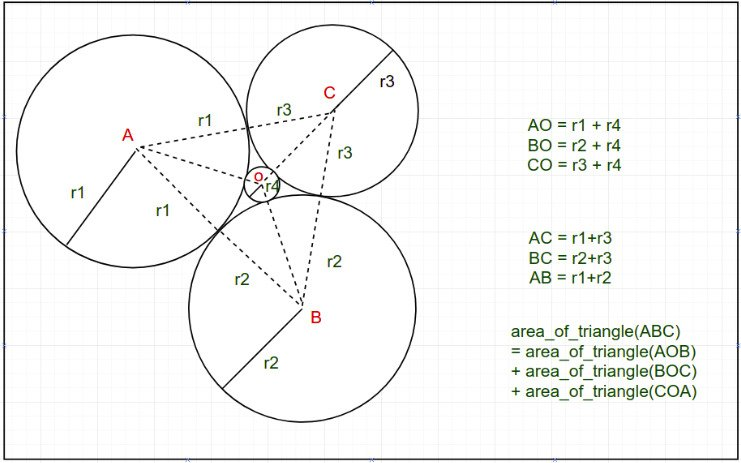 


The task is to find the radius r4 of the circle formed by three circles when radius r1, r2, r3 are given. 
(Note that the circles in the picture above are tangent to each other.)

Examples: 

Input: r1 = 1, r2 = 1, r3 = 1 
Output: 0.154701



Input: r1 = 23, r2 = 46, r3 = 69 
Output: 6.000000 

In [17]:
# Python3 implementation of the approach
import math

# Radius of the 3 given circles
r1 = 0
r2 = 0
r3 = 0

# Calculation of area of a
# triangle by Heron's formula
def area(a, b, c):
	
	p = (a + b + c) / 2

	return ((math.sqrt(p)) *
			(math.sqrt(p - a)) *
			(math.sqrt(p - b)) *
			(math.sqrt(p - c)))

# Applying binary search to find the
# radius r4 of the required circle
def binary_search():
	
	global r1, r2, r3

	# Area of main triangle
	s = area(r1 + r2, r2 + r3, r3 + r1)
	l = 0
	h = s / (r1 + r2 + r3)

	# Loop runs until l and h
	# becomes approximately equal
	while (h - l > 0.00000001):
		mid = (l + h) / 2

		# Area of smaller triangles
		s1 = area(mid + r1, mid + r2, r1 + r2)
		s2 = area(mid + r1, mid + r3, r1 + r3)
		s3 = area(mid + r2, mid + r3, r2 + r3)

		# If sum of smaller triangles
		# is less than main triangle
		if (s1 + s2 + s3 < s):
			l = mid
			
		# If sum of smaller triangles is
		# greater than or equal to main triangle
		else:
			h = mid
			
	return ((l + h) / 2)

# Driver code

# Taking r1, r2, r3 as input
r1 = 1
r2 = 2
r3 = 3

# Call to function binary search
print("{0:.6f}".format(binary_search()))



0.260870


58. There are n stairs, a person standing at the bottom wants to reach the top. The person can climb either 1 stair or 2 stairs at a time. Count the number of ways, the person can reach the top.
 

In [19]:
# Python program to count
# ways to reach nth stair

# Recursive function to find
# Nth fibonacci number
def fib(n):
	if n <= 1:
		return n
	return fib(n-1) + fib(n-2)

# Returns no. of ways to
# reach sth stair
def countWays(s):
	return fib(s + 1)

# Driver program
s = 4
print("Number of ways = ")
print(countWays(s))


Number of ways = 
5


59. Given weights and values of n items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. In other words, given two integer arrays val[0..n-1] and wt[0..n-1] which represent values and weights associated with n items respectively. Also given an integer W which represents knapsack capacity, find out the maximum value subset of val[] such that sum of the weights of this subset is smaller than or equal to W. You cannot break an item, either pick the complete item or don’t pick it (0-1 property).

In [21]:
# A naive recursive implementation
# of 0-1 Knapsack Problem

# Returns the maximum value that
# can be put in a knapsack of
# capacity W


def knapSack(W, wt, val, n):

	# Base Case
	if n == 0 or W == 0:
		return 0

	# If weight of the nth item is
	# more than Knapsack of capacity W,
	# then this item cannot be included
	# in the optimal solution
	if (wt[n-1] > W):
		return knapSack(W, wt, val, n-1)

	# return the maximum of two cases:
	# (1) nth item included
	# (2) not included
	else:
		return max(
			val[n-1] + knapSack(
				W-wt[n-1], wt, val, n-1),
			knapSack(W, wt, val, n-1))

# end of function knapSack


#Driver Code
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print(knapSack(W, wt, val, n))


220


60. Given two strings ‘X’ and ‘Y’, find the length of the longest common substring. 

Examples : 

Input : X = “GeeksforGeeks”, y = “GeeksQuiz” 
Output : 5 
Explanation:
The longest common substring is “Geeks” and is of length 5.

Input : X = “abcdxyz”, y = “xyzabcd” 
Output : 4 
Explanation:
The longest common substring is “abcd” and is of length 4.

In [22]:
# Python3 implementation of Finding
# Length of Longest Common Substring

# Returns length of longest common
# substring of X[0..m-1] and Y[0..n-1]


def LCSubStr(X, Y, m, n):

	# Create a table to store lengths of
	# longest common suffixes of substrings.
	# Note that LCSuff[i][j] contains the
	# length of longest common suffix of
	# X[0...i-1] and Y[0...j-1]. The first
	# row and first column entries have no
	# logical meaning, they are used only
	# for simplicity of the program.

	# LCSuff is the table with zero
	# value initially in each cell
	LCSuff = [[0 for k in range(n+1)] for l in range(m+1)]

	# To store the length of
	# longest common substring
	result = 0

	# Following steps to build
	# LCSuff[m+1][n+1] in bottom up fashion
	for i in range(m + 1):
		for j in range(n + 1):
			if (i == 0 or j == 0):
				LCSuff[i][j] = 0
			elif (X[i-1] == Y[j-1]):
				LCSuff[i][j] = LCSuff[i-1][j-1] + 1
				result = max(result, LCSuff[i][j])
			else:
				LCSuff[i][j] = 0
	return result


# Driver Code
X = 'OldSite:GeeksforGeeks.org'
Y = 'NewSite:GeeksQuiz.com'

m = len(X)
n = len(Y)

print('Length of Longest Common Substring is',
	LCSubStr(X, Y, m, n))


Length of Longest Common Substring is 10
